# **Imports**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/KDDTest+.arff
/kaggle/input/KDDTest-21.arff
/kaggle/input/KDDTest1.jpg
/kaggle/input/KDDTrain+.txt
/kaggle/input/KDDTrain+_20Percent.txt
/kaggle/input/KDDTest-21.txt
/kaggle/input/KDDTest+.txt
/kaggle/input/KDDTrain+.arff
/kaggle/input/index.html
/kaggle/input/KDDTrain+_20Percent.arff
/kaggle/input/KDDTrain1.jpg
/kaggle/input/nsl-kdd/KDDTest+.arff
/kaggle/input/nsl-kdd/KDDTest-21.arff
/kaggle/input/nsl-kdd/KDDTest1.jpg
/kaggle/input/nsl-kdd/KDDTrain+.txt
/kaggle/input/nsl-kdd/KDDTrain+_20Percent.txt
/kaggle/input/nsl-kdd/KDDTest-21.txt
/kaggle/input/nsl-kdd/KDDTest+.txt
/kaggle/input/nsl-kdd/KDDTrain+.arff
/kaggle/input/nsl-kdd/index.html
/kaggle/input/nsl-kdd/KDDTrain+_20Percent.arff
/kaggle/input/nsl-kdd/KDDTrain1.jpg


In [2]:
# importing required libraries
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense, SimpleRNN, MaxPool1D, Flatten, Dropout # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
# representation of model layers
# from keras.utils.vis_utils import plot_model

2024-10-09 08:01:11.317926: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-09 08:01:11.318064: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-09 08:01:11.505954: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Reading Data

In [3]:
feature=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count", 
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

In [4]:
train='../input/KDDTrain+.txt'
test='../input/KDDTest+.txt'
test21='../input/KDDTest-21.txt'
train_data=pd.read_csv(train,names=feature)
test_data=pd.read_csv(test,names=feature)
test_data21 = pd.read_csv(test21, names= feature)
data= pd.concat([train_data, test_data], ignore_index=True)

In [5]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
148513,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
148514,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15
148515,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [6]:
# remove attribute 'difficulty_level'
data.drop(['difficulty'],axis=1,inplace=True)

## Exploring Data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  int64  
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  int64  
 5   dst_bytes                    148517 non-null  int64  
 6   land                         148517 non-null  int64  
 7   wrong_fragment               148517 non-null  int64  
 8   urgent                       148517 non-null  int64  
 9   hot                          148517 non-null  int64  
 10  num_failed_logins            148517 non-null  int64  
 11  logged_in                    148517 non-null  int64  
 12  num_compromised              148517 non-null  int64  
 13 

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,148517.0,276.779305,2.460683e+03,0.0,0.00,0.00,0.00,5.771500e+04
src_bytes,148517.0,40227.949299,5.409612e+06,0.0,0.00,44.00,278.00,1.379964e+09
dst_bytes,148517.0,17088.853593,3.703525e+06,0.0,0.00,0.00,571.00,1.309937e+09
land,148517.0,0.000215,1.467714e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,148517.0,0.020523,2.400691e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,148517.0,0.000202,1.941708e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,148517.0,0.189379,2.013160e+00,0.0,0.00,0.00,0.00,1.010000e+02
num_failed_logins,148517.0,0.004323,7.224823e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,148517.0,0.402789,4.904606e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,148517.0,0.255062,2.223137e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [9]:
# number of attack labels 
data['label'].value_counts()

label
normal             77054
neptune            45871
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
loadmodule            11
ftp_write             11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
worm                   2
sqlattack              2
udpstorm           

In [10]:
# Redistribute across common attack class
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [11]:
change_label(data)

/tmp/ipykernel_34/689065425.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)


In [12]:
# distribution of attack classes
data.label.value_counts()

label
normal    77054
Dos       53387
Probe     14077
R2L        3880
U2R         119
Name: count, dtype: int64

In [13]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Encode categorical features using one-hot encoding
categorical_features = ["protocol_type", "service", "flag"]
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(data[categorical_features])

# Get feature names from encoder.categories_
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# Create a DataFrame for encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Concatenate encoded features with numerical features
data_encoded = pd.concat([data.drop(categorical_features, axis=1), encoded_df], axis=1)

# Apply label conversion function
change_label(data_encoded)

# Separate features (X) and target labels (y)
X = data_encoded.drop('label', axis=1)
y = data_encoded['label']

# Print shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/tmp/ipykernel_34/689065425.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)


Shape of X: (148517, 122)
Shape of y: (148517,)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [15]:
from sklearn.preprocessing import RobustScaler

# Scale the features using RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# import numpy as np
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from tqdm import tqdm

# class Beluga:
#     def __init__(self, num_features):
#         self.position = np.random.choice([0, 1], size=num_features)
#         self.fitness = float('inf')

# def fitness(X_train, y_train, X_test, y_test, selected_features):
#     selected_indices = np.where(selected_features)[0].tolist()  # Convert indices to a list
    
#     if len(selected_indices) == 0:
#         return float('inf')  # Penalize for selecting no features
    
#     clf = RandomForestClassifier(random_state=42)
#     clf.fit(X_train.iloc[:, selected_indices], y_train)  # Use iloc for integer-location indexing
#     y_pred = clf.predict(X_test.iloc[:, selected_indices])
#     return 1 - accuracy_score(y_test, y_pred)

# def beluga_whale_optimization(X_train, y_train, X_test, y_test, num_belugas=10, max_iter=10):
#     num_features = X_train.shape[1]
#     belugas = [Beluga(num_features) for _ in range(num_belugas)]
#     global_best_position = np.zeros(num_features)
#     global_best_fitness = float('inf')

#     for iteration in range(max_iter):
#         a = 2 - iteration * (2 / max_iter)  # Linearly decreasing parameter
#         for beluga in tqdm(belugas, desc=f"Iteration {iteration+1}/{max_iter}"):
#             r1 = np.random.rand()
#             r2 = np.random.rand()
#             A = 2 * a * r1 - a  # Similar to WOA's encircling prey
#             C = 2 * r2  # Similar to WOA's bubble-net behavior
            
#             # Choose a strategy based on beluga social behavior
#             if np.random.rand() < 0.5:
#                 # Social cooperation: Beluga whales work together
#                 D = np.abs(C * global_best_position - beluga.position)
#                 new_position = global_best_position - A * D
#             else:
#                 # Exploration: Individual beluga randomly searches
#                 D = np.abs(C * beluga.position - np.random.choice(belugas).position)
#                 new_position = beluga.position + A * D

#             # Apply new position
#             beluga.position = np.clip(new_position, 0, 1).astype(int)

#             # Evaluate fitness
#             beluga.fitness = fitness(X_train, y_train, X_test, y_test, beluga.position)

#             # Update global best position
#             if beluga.fitness < global_best_fitness:
#                 global_best_position = beluga.position
#                 global_best_fitness = beluga.fitness

#     return global_best_position

# # Apply BWO algorithm to select features
# selected_features = beluga_whale_optimization(X_train, y_train, X_test, y_test, num_belugas=10, max_iter=2)
# selected_indices = np.where(selected_features)[0].tolist()  # Convert indices to a list
# X_train_selected = X_train.iloc[:, selected_indices]  # Use iloc for integer-location indexing
# X_test_selected = X_test.iloc[:, selected_indices]
# print("Selected features:", selected_indices)


In [17]:
# # import numpy as np
# # import pandas as pd
# # from tqdm import tqdm
# # from sklearn.ensemble import RandomForestClassifier
# # from sklearn.metrics import recall_score
# import numpy as np
# from tqdm import tqdm
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# class WaterDrop:
#     def __init__(self, num_features):
#         self.position = np.random.choice([0, 1], size=num_features)
#         self.fitness = float('inf')

# def fitness(X_train, y_train, X_test, y_test, selected_features):
#     selected_indices = np.where(selected_features)[0]
#     clf = RandomForestClassifier(random_state=42)
#     clf.fit(X_train[:, selected_indices], y_train)
#     y_pred = clf.predict(X_test[:, selected_indices])
#     return 1 - accuracy_score(y_test, y_pred)

# def artificial_water_drop_algorithm(X_train, y_train, X_test, y_test, num_water_drops=10, max_iter=10):
#     num_features = X_train.shape[1]
#     water_drops = [WaterDrop(num_features) for _ in range(num_water_drops)]
#     global_best_position = np.zeros(num_features)
#     global_best_fitness = float('inf')

#     for iteration in range(max_iter):
#         for water_drop in tqdm(water_drops, desc=f"Iteration {iteration+1}/{max_iter}"):
#             # Update water drop's position
#             new_position = water_drop.position.copy()
#             for i in range(num_features):
#                 if np.random.rand() < 0.5:  # Randomly move the water drop
#                     new_position[i] = 1 - new_position[i]
#             water_drop.position = new_position

#             # Evaluate fitness
#             water_drop.fitness = fitness(X_train, y_train, X_test, y_test, water_drop.position)

#             # Update global best position
#             if water_drop.fitness < global_best_fitness:
#                 global_best_position = water_drop.position
#                 global_best_fitness = water_drop.fitness

#     return global_best_position

# # Apply AWD algorithm to select features
# selected_features = artificial_water_drop_algorithm(X_train_scaled, y_train, X_test_scaled, y_test, num_water_drops=2, max_iter=2)
# selected_indices = np.where(selected_features)[0]
# X_train_selected = X_train_scaled[:, selected_indices]
# X_test_selected = X_test_scaled[:, selected_indices]


# # class Jackal:
# #     def __init__(self, num_features):
# #         self.position = np.random.choice([0, 1], size=num_features)
# #         self.fitness = float('inf')

# # def fitness(X_train, y_train, X_test, y_test, selected_features):
# #     selected_indices = np.where(selected_features)[0]
# #     if len(selected_indices) == 0:
# #         return 1  # If no features are selected, return worst fitness
# #     clf = RandomForestClassifier(random_state=42)
# #     clf.fit(X_train.iloc[:, selected_indices], y_train)
# #     y_pred = clf.predict(X_test.iloc[:, selected_indices])
# #     return 1 - recall_score(y_test, y_pred)

# # def golden_jackal_optimization(X_train, y_train, X_test, y_test, num_jackals=10, max_iter=2):
# #     num_features = X_train.shape[1]
# #     jackals = [Jackal(num_features) for _ in range(num_jackals)]
# #     global_best_position = np.zeros(num_features)
# #     global_best_fitness = float('inf')

# #     for iteration in range(max_iter):
# #         for jackal in tqdm(jackals, desc=f"Iteration {iteration+1}/{max_iter}"):
# #             # Update jackal's position using some strategic movement rules
# #             new_position = jackal.position.copy()
# #             for i in range(num_features):
# #                 if np.random.rand() < 0.5:  # Randomly move the jackal
# #                     new_position[i] = 1 - new_position[i]
# #             jackal.position = new_position

# #             # Evaluate fitness
# #             jackal.fitness = fitness(X_train, y_train, X_test, y_test, jackal.position)

# #             # Update global best position
# #             if jackal.fitness < global_best_fitness:
# #                 global_best_position = jackal.position
# #                 global_best_fitness = jackal.fitness

# #     return global_best_position

# # # Select features using GJO algorithm
# # selected_features = golden_jackal_optimization(X_train, y_train, X_test, y_test)

# # # Retain only selected features
# # X_train_selected = X_train.iloc[:, selected_features == 1]
# # X_test_selected = X_test.iloc[:, selected_features == 1]


In [3]:
# from sklearn.preprocessing import RobustScaler

# # Scale the selected features using RobustScaler
# scaler = RobustScaler()
# X_train_scaled = scaler.fit_transform(X_train_selected)
# X_test_scaled = scaler.transform(X_test_selected)


In [19]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the labels
y_train_encoded = label_encoder.fit_transform(y_train)

In [20]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical labels using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Fetch the number of classes
num_classes = len(label_encoder.classes_)
print("Number of classes:", num_classes)


Number of classes: 5


In [ ]:
# from keras.models import Sequential
# from keras.layers import LSTM, Dense, Dropout

# model = Sequential() # initializing model
# model.add(LSTM(1024,return_sequences=True,input_shape = (1, X_train.shape[1])))
# model.add(Dropout(0.5))
# model.add(LSTM(526,return_sequences=True))
# model.add(Dropout(0.5))
# model.add(LSTM(224,return_sequences=True))
# model.add(Flatten())
# model.add(Dense(units=100))
# # output layer with softmax activation
# model.add(Dense(units=5,activation='softmax'))
# # summary of model layers
# model.summary()

from keras.layers import Dense, SimpleRNN, MaxPool1D, Flatten, Dropout # importing dense layer
from keras.models import Sequential 

# Reshape for the RNN model
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(units=64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))  
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Assuming num_classes is known

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_reshaped, y_train_encoded, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

In [23]:
from keras.layers import Dense, SimpleRNN, Bidirectional, LSTM  # Import necessary layers
from keras.models import Sequential

# Reshape for the RNN model
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Define the RNN model with SimpleRNN followed by a BiLSTM layer
model = Sequential()
model.add(SimpleRNN(units=64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Bidirectional(LSTM(units=64)))  
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Assuming num_classes is known

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_reshaped, y_train_encoded, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/10
1294/1300 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9137 - loss: 0.2986

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x7a6f9f1cb7f0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/weakref.py", line 370, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt: 


1300/1300 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9139 - loss: 0.2978 - val_accuracy: 0.9719 - val_loss: 0.0828
Epoch 2/10
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9729 - loss: 0.0788 - val_accuracy: 0.9731 - val_loss: 0.0831
Epoch 3/10
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9746 - loss: 0.0729 - val_accuracy: 0.9757 - val_loss: 0.0713
Epoch 4/10
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9741 - loss: 0.0702 - val_accuracy: 0.9756 - val_loss: 0.0768
Epoch 5/10
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9769 - loss: 0.0644 - val_accuracy: 0.9774 - val_loss: 0.0650
Epoch 6/10
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9766 - loss: 0.0621 - val_accuracy: 0.9775 - val_loss: 0.0639
Epoch 7/10
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9770 - loss: 0.0615 - val_accuracy: 0.9760 - val_loss: 0.0671
Epoch 8/10
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9781 - loss: 0.0591 - val_accura

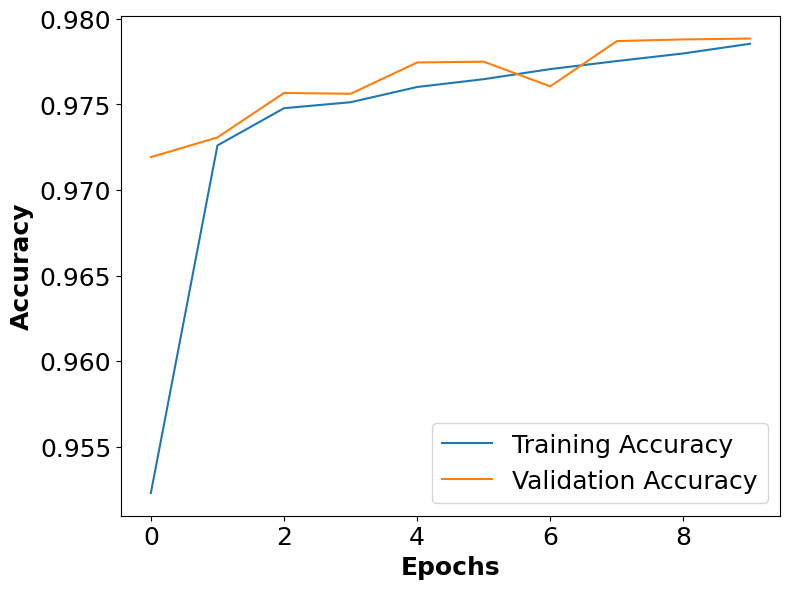

In [24]:
# Plotting epoch versus accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Epoch vs Accuracy',weight='bold')
plt.xlabel('Epochs',weight='bold',fontsize=18)
plt.ylabel('Accuracy',weight='bold',fontsize=18)
plt.xticks(np.arange(0, len(history.history['accuracy']), step=2)) 
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

plt.tight_layout()
plt.show()

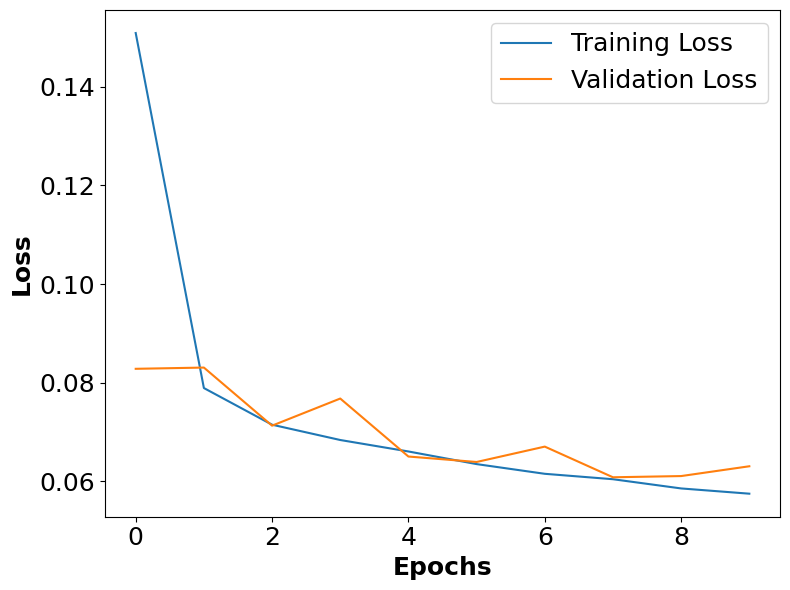

In [25]:
# Plotting epoch versus loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Epoch vs Loss',weight='bold')
plt.xlabel('Epochs',weight='bold',fontsize=18)
plt.ylabel('Loss',weight='bold',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

plt.tight_layout()
plt.show()

In [27]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the test labels
y_test_encoded = label_encoder.fit_transform(y_test)

# Predict probabilities for each class
y_pred_probabilities = model.predict(X_test_reshaped)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Inverse transform encoded labels to original labels
y_test_original = label_encoder.inverse_transform(y_test_encoded)
y_pred_original = label_encoder.inverse_transform(y_pred)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_original, y_pred_original,digits=4))

1393/1393 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Classification Report:
              precision    recall  f1-score   support

         Dos     0.9975    0.9888    0.9931     16081
       Probe     0.9873    0.9013    0.9423      4144
         R2L     0.9640    0.7385    0.8363      1197
         U2R     0.6842    0.4062    0.5098        32
      normal     0.9621    0.9952    0.9783     23102

    accuracy                         0.9768     44556
   macro avg     0.9190    0.8060    0.8520     44556
weighted avg     0.9771    0.9768    0.9762     44556



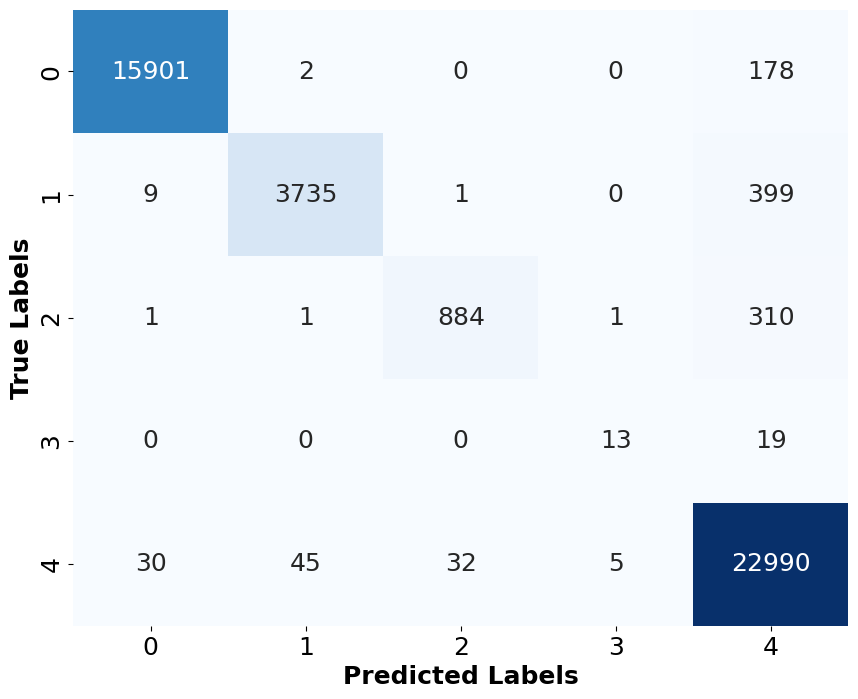

In [28]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cm = confusion_matrix(y_test_original, y_pred_original)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 18})
# plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels',fontsize=18,weight='bold')
plt.ylabel('True Labels',fontsize=18,weight='bold')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()